In [32]:
import dask.dataframe as dd
import pandas as pd
import pandas_profiling as pp
import numpy as np

# Data Exploration

Let's explore a bit the structure of each of the data provided to us.

First off, let's load the expression data.

In [28]:
expression_df = dd.read_csv('../data/ViralChallenge_training_EXPRESSION_RMA.tsv', sep="\t")
expression_df

dd.DataFrame<from-de..., npartitions=27>

In [29]:
expression_df.describe().compute()

,1359_267001_HG-U133A_2_41802_DU07-02S06023.CEL,1359_267002_HG-U133A_2_41803_DU07-02S06196.CEL,1359_267003_HG-U133A_2_41804_DU07-02S06190.CEL,1359_267004_HG-U133A_2_41805_DU07-02S06002.CEL,1359_267005_HG-U133A_2_41806_DU07-02S06813.CEL,1359_267006_HG-U133A_2_41807_DU07-02S06192.CEL,1359_267007_HG-U133A_2_41808_DU07-02S05998.CEL,1359_267008_HG-U133A_2_41809_DU07-02S06807.CEL,1359_267009_HG-U133A_2_41810_DU07-02S03423.CEL,1359_267010_HG-U133A_2_41811_DU07-02S06805.CEL,...,2959_207861_HG-U133A_2_DU11-02S14057.CEL,2959_207862_HG-U133A_2_DU11-02S13903.CEL,2959_207863_HG-U133A_2_DU11-02S12061.CEL,2959_209104_HG-U133A_2_DU11-02S10608_37102.CEL,2959_209105_HG-U133A_2_DU11-02S13884_37103.CEL,2959_209106_HG-U133A_2_DU11-02S12614_37104.CEL,2959_209108_HG-U133A_2_DU11-02S11909_37106.CEL,2959_209110_HG-U133A_2_DU11-02S14698_37108.CEL,2959_209111_HG-U133A_2_DU11-02S10604_37109.CEL,2959_209113_HG-U133A_2_DU11-02S10600_37111.CEL
count,22277.000000,22277.000000,22277.000000,22277.000000,22277.000000,22277.000000,22277.000000,22277.000000,22277.000000,22277.000000,...,22277.000000,22277.000000,22277.000000,22277.000000,22277.000000,22277.000000,22277.000000,22277.000000,22277.000000,22277.000000
mean,6.921400,6.935859,6.922261,6.935892,6.954544,6.944312,6.946065,6.924107,6.906131,6.913078,...,6.943036,6.955064,6.982101,6.985898,6.984924,6.965654,6.990255,6.960311,6.958146,6.962315
std,2.096796,2.122171,2.115084,2.109191,2.202314,2.150475,2.158044,2.106653,2.025986,2.032078,...,2.147302,2.160888,2.198382,2.231505,2.260028,2.180502,2.217921,2.107778,2.138753,2.126384
min,3.073959,3.068887,2.993459,3.019056,3.043383,3.056225,3.073183,2.937167,3.086759,3.064118,...,2.996562,2.910182,3.102592,3.066063,2.962620,3.057105,3.073871,3.056392,3.021631,3.009176
25%,5.917075,5.867260,5.906455,5.879266,5.801718,5.861123,5.807234,5.892868,6.041295,6.015189,...,5.857091,5.875031,5.754975,5.813493,5.745416,5.869748,5.804152,5.964902,5.964157,5.911623
50%,7.568419,7.531649,7.546725,7.587097,7.620074,7.552090,7.627755,7.569310,7.372592,7.425733,...,7.492677,7.446610,7.569318,7.626423,7.646703,7.605504,7.603166,7.420470,7.371731,7.471676
75%,10.748555,10.826669,10.805038,10.781538,10.988177,10.923904,10.947632,10.766456,10.589365,10.654006,...,10.926464,10.883160,11.110975,11.153522,11.302838,11.022459,11.143046,10.886456,10.762195,10.862240
max,15.083092,15.121555,15.087082,15.139452,15.132529,15.100740,15.153847,15.092350,15.087332,15.088848,...,15.090479,15.129438,15.028418,15.074031,14.987459,15.114301,15.132529,15.048622,15.146937,15.046067


In [24]:
expression_df.columns

Index(['FEATUREID', '1590_266948_HG-U133A_2_41828_DU08-02S09371.CEL',
       '1359_54390_H133A2_16365_DU08-02S09500.CEL',
       '1359_54408_H133A2_16286_DU08-02S09374.CEL',
       '1359_54410_H133A2_16287_DU08-02S09357.CEL',
       '1359_54411_H133A2_16373_DU08-02S09360.CEL',
       '1359_54432_H133A2_16300_DU08-02S09151.CEL',
       '1359_54433_H133A2_16382_DU08-02S09154.CEL',
       '1359_54434_H133A2_16301_DU08-02S09212.CEL',
       '1359_54435_H133A2_16383_DU08-02S09203.CEL',
       ...
       '1359_267012_HG-U133A_2_41813_DU07-02S06811.CEL',
       '1359_267013_HG-U133A_2_41814_DU07-02S06817.CEL',
       '1359_267014_HG-U133A_2_41815_DU07-02S06000.CEL',
       '1359_267015_HG-U133A_2_41816_DU07-02S06029.CEL',
       '1359_267016_HG-U133A_2_41817_DU07-02S06194.CEL',
       '1359_267017_HG-U133A_2_41818_DU07-02S06200.CEL',
       '1359_267018_HG-U133A_2_41819_DU07-02S06809.CEL',
       '1359_267019_HG-U133A_2_41820_DU07-02S06198.CEL',
       '1359_267020_HG-U133A_2_41821_DU07-02S06

According to the [data description page](https://www.synapse.org/#!Synapse:syn5647810/wiki/399110), each column above corresponds to a sample as listed in the clinical TSV file. 

Only the first column, "FEATUREID", corresponds to the probeset; this is matched to a gene. The genes are listed in the annotation file, `HG-U133A_2.na35.annot.csv`. This might be useful to look at later on, after identifying genes that are highly predictive of, say, shedding.

I decided to go open up the clinical TSV file to take a look at its structure.

In [25]:
clinical_df = pd.read_csv('../data/ViralChallenge_training_CLINICAL.tsv', sep='\t')
clinical_df.head()

,STUDYID,SUBJECTID,AGE,GENDER,EARLYTX,SHAM,SHEDDING_SC1,SYMPTOMATIC_SC2,LOGSYMPTSCORE_SC3,TIMEHOURS,SAMPLEID,CEL
0,DEE1 RSV,RSV004,25,Male,NaN,NaN,0,0,0.000000,-24.0,DU08-02S09371,1590_266948_HG-U133A_2_41828_DU08-02S09371.CEL
1,DEE1 RSV,RSV020,31,Male,NaN,NaN,1,1,1.230449,-24.0,DU08-02S09500,1359_54390_H133A2_16365_DU08-02S09500.CEL
2,DEE1 RSV,RSV010,30,Female,NaN,NaN,0,0,0.477121,-24.0,DU08-02S09374,1359_54408_H133A2_16286_DU08-02S09374.CEL
3,DEE1 RSV,RSV009,23,Female,NaN,NaN,0,0,0.477121,-24.0,DU08-02S09357,1359_54410_H133A2_16287_DU08-02S09357.CEL
4,DEE1 RSV,RSV018,22,Male,NaN,NaN,1,1,0.903090,-24.0,DU08-02S09360,1359_54411_H133A2_16373_DU08-02S09360.CEL


Each sample corresponds to one subject (`SUBJECTID`) from one study (`STUDYID`) at one timepoint (`TIMEHOURS`).

Other features are available - Age (`AGE`), Biological Sex (`GENDER`), whether there was treatment (`EARLYTX`), whether the patient was sham-infected (`SHAM`), whether the patient was shedding or not (`SHEDDING_SC1`) (very conveniently summarized for us!) and the log symptom score (`LOGSYMPTSCORE_SC3`).

Reminder: The challenge includes predicting:

- whether a patient was shedding
- whether a patient was symptomatic
- the pateint's log symptom score at the end of the trial, which correspond to the `_SC1`, `_SC2` and `_SC3` columns.

How many patient samples were taken?

In [40]:
clinical_by_subjectid = []
for grp, df in clinical_df.groupby(['STUDYID', 'SUBJECTID']):
    clinical_by_subjectid.append(df)

In [41]:
n_samples = len(clinical_by_subjectid)

print('A total of {n_samples} samples were taken.'.format(n_samples=n_samples))

A total of 125 samples were taken.


Let's take a look at one of the samples' data.

In [55]:
clinical_by_subjectid[92]

,STUDYID,SUBJECTID,AGE,GENDER,EARLYTX,SHAM,SHEDDING_SC1,SYMPTOMATIC_SC2,LOGSYMPTSCORE_SC3,TIMEHOURS,SAMPLEID,CEL
1774,Rhinovirus Duke,HRV10-011,30,Male,NaN,NaN,1,0,0.778151,0.0,DU10-04S11070,2536_116974_hg-u133a_2_31226_du10-04s11070.cel
1818,Rhinovirus Duke,HRV10-011,30,Male,NaN,NaN,1,0,0.778151,8.0,DU10-04S11773,2536_117007_hg-u133a_2_31555_du10-04s11773.cel
1843,Rhinovirus Duke,HRV10-011,30,Male,NaN,NaN,1,0,0.778151,12.0,DU10-04S16172,2536_117421_HG-U133A_2_31279_DU10-04S16172__N3...
1846,Rhinovirus Duke,HRV10-011,30,Male,NaN,NaN,1,0,0.778151,16.0,DU10-04S16460,2536_117281_HG-U133A_2_31356_DU10-04S16460.CEL
1870,Rhinovirus Duke,HRV10-011,30,Male,NaN,NaN,1,0,0.778151,20.0,DU10-04S16807,2536_117042_hg-u133a_2_31416_du10-04s16807.cel
1884,Rhinovirus Duke,HRV10-011,30,Male,NaN,NaN,1,0,0.778151,24.0,DU10-04S16955,2536_117036_hg-u133a_2_31354_du10-04s16955.cel
1928,Rhinovirus Duke,HRV10-011,30,Male,NaN,NaN,1,0,0.778151,36.0,DU10-04S08373,2536_117297_HG-U133A_2_31513_DU10-04S08373.CEL
1942,Rhinovirus Duke,HRV10-011,30,Male,NaN,NaN,1,0,0.778151,42.0,DU10-04S08566,2536_117022_hg-u133a_2_31213_du10-04s08566.cel
1977,Rhinovirus Duke,HRV10-011,30,Male,NaN,NaN,1,0,0.778151,48.0,DU10-04S07241,2536_117328_HG-U133A_2_31336_DU10-04S07241.CEL
1983,Rhinovirus Duke,HRV10-011,30,Male,NaN,NaN,1,0,0.778151,60.0,DU10-04S06890,2536_117220_hg-u133a_2_31231_du10-04s06890.cel


When were the timepoints that were taken?

In [44]:
np.unique(clinical_df['TIMEHOURS'].values)

array([ -30. ,  -24. ,    0. ,    2. ,    4. ,    5. ,    8. ,   10. ,
         12. ,   16. ,   18. ,   20. ,   21.5,   24. ,   26. ,   29. ,
         30. ,   34. ,   36. ,   42. ,   45.5,   48. ,   50. ,   53. ,
         58. ,   60. ,   66. ,   69.5,   72. ,   74. ,   77. ,   82. ,
         84. ,   90. ,   93.5,   96. ,   98. ,  101. ,  106. ,  108. ,
        114. ,  117.5,  120. ,  122. ,  125. ,  130. ,  132. ,  136. ,
        138. ,  141.5,  146. ,  162. ,  165.5,  170. ,  672. ])

Because this is timepoint data, and because it is so varied, it may be necessary to "adjust" the timepoints in some fashion to some round integer multiple, so that the data can be standardized. Otherwise, there may be insufficient data per timepoint to make any conclusions.

Let's check that assumption first.

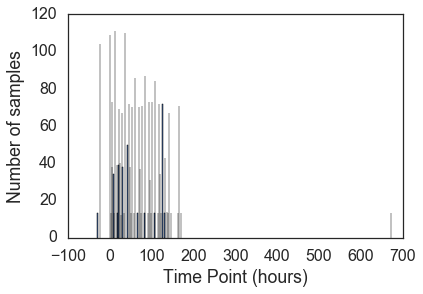

In [50]:
from collections import Counter
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('poster')
sns.set_style('white')

%matplotlib inline

timepoints = Counter(clinical_df['TIMEHOURS'])

plt.bar(timepoints.keys(), timepoints.values())
plt.xlabel('Time Point (hours)')
plt.ylabel('Number of samples')

As we can see from the plot above, there's an outlier timepoint at 600+ hours. I think we can safely ignore that timepoint. 

I'm still not sure which is the best "interval" to standardize the data on.

After today's meeting, where we looked at the data together as a team, it looks like the data format that we'll need is as such:

- rows = each patient.
- columns = one gene-timepoint combination.

Timepoints only have to be considered up till 24 hours. No need to consider beyond that - the challenge only goes up to 24 hours ([link](https://www.synapse.org/#!Synapse:syn5647810/wiki/399109)).